# Stage.3 the experiment of the weight of numerical attributes

### Research Manuscript - timestamp: 2020.10.28
In Stage.3 I have completed the coding construction work about the weight of numerical hypothesis and get the experimental results. I built the improvedOCIL python modules hereinafter, and tested the clustering accuracy about the new ehanced algorithm. By visualing the data in the figures, We will see the introducing of the weight of numerical attributes actually improve the performance of the clustering algorithm. And the weight indeed help algorithm meet the convergence faster in numerical side. Here are the references of the improved method and some analysis about the experimental results.

### The Essential References
1. Subspace Clustering of High Dimensional Data ---- 2004, Carlotta Domeniconi (George Mason University) etc.
2. Clustering Mixed Data by Fast Search and Find of Density Peaks ---- Shihua Liu (Zhejiang University of Technology)

The process of calculation the weight in the paper 1. actually inspired me, based on that I have optimized some details about the method. And made it more proper to the OCIL algorithm.

### The Origin method of calculating the weight of numerical attributes:
The wji is the weight of each attributes in the cluster j, and h is constant, recognized to be 12 in the papers.
$$
\begin{array}{l}
\text { Set } w_{j i}=\exp \left(-h \times X_{j i}\right) /\left(\sum_{l=1}^{N} \exp (-h \times 2 \times\right. 
\left.\left.X_{j l}\right)\right)^{1 / 2}
\end{array}
$$
By introducing the weight, we can find a more suitable centroid cj:
$$
\begin{array}{l}
\text { Set } S_{j}=\left\{\mathbf{x} \mid j=\arg \min _{l} L_{w}\left(\mathbf{c}_{l}, \mathbf{x}\right)\right\}, L_{w}\left(\mathbf{c}_{l}, \mathbf{x}\right)= 
\left(\sum_{i=1}^{N} w_{l i}\left(c_{l i}-x_{i}\right)^{2}\right)^{1 / 2}
\end{array}
$$
Subsequently I will write the detailed mathematical derivation process and review it in next manuscript and final paper.

### My improved method and results analysis
1. Paper 原文提到的方法中，权重向量是随着聚类集群迭代的，每个集群都有一个实时的权重向量。但是如果面对Numerical Attributes之间方差差异不大的情况会过早出现局部最优，**收敛过快**。所以我又自行设计了一个新的权重向量的计算方法，面向所有数值向量，计算一个**固定的全局权重**。下面实验中“iterative”就是paper原文中提到的迭代方法，而“Overall”就是重新设计的全局权重
2. 数据标准化很重要！！！Z-score会一定程度上改变数据的分布，统一为（0，1）正太分布，抹平方差的差异，让数值向量权重设计失去作用，所以应该尝试不同的数据标准化方式，保留数据样本方差的差异，这里暂时使用了MinMax的标准化，使得所有数据都落在[0,1]，但是这种标准化并不Resistant，Outlier依然会影响结果，下一步准备改用更合适的标准化方法。实验结果中**第一张图**是采用Z-score的结果，**第二张图**是采用MinMax的结果
3. 通过分析实验结果(figure 2.)可以看出权重的引入让数值向量侧更快地收敛，总体准确率快速提升，从而在特定场景下准确率明显优于原始的OCIL算法。但也要注意的是，数值属性之间方差差异大的数据集，权重提升的效果更明显，而如果数据集数值属性之间方差差异不大，过早出现局部最优解，算法提升效果会大打折扣，下一步目标就是寻找更适合的数据集，就可以开始收集论文中所需要的数据了
4. 下一步计划：寻找合适的数据集/以及验证半监督思想寻找聚类中心的算法

### the dataset of iris
The data set used in the first week of the experiment is also tested here. And the iris data set is a total numerical datasets

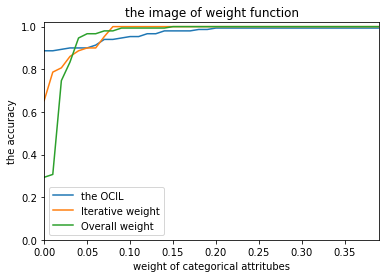

In [1]:
import ImpOCIL 
import copy
import numpy as np
from sklearn.datasets import load_iris
klist = [30,80,120]
iris = load_iris()
clusterNNew = iris.data[klist,:]
clusterCate = iris.target.reshape(150,1)
clusterC = clusterCate.astype(np.object)
clusterCNew = copy.deepcopy(clusterC[klist,:])
ImpOCIL.accuracyFigure(clusterC,iris.data,clusterCNew,clusterNNew,20,0.0,0.4,0.01,clusterCate[:,0])

### the dataset of Credit Card
I used the dataset of the Credit card which was downloaded from UCI repository, The results of clustering was clear and we can see the weight of numerical attributes accelerated the convergence in numerical side.

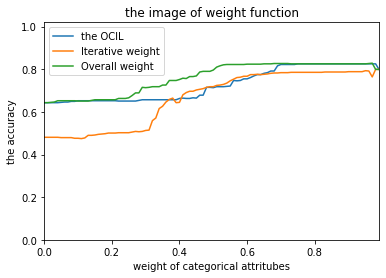

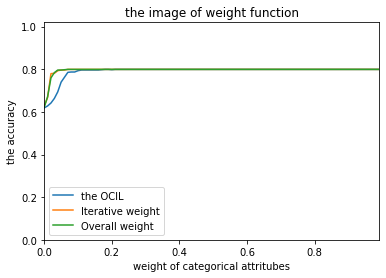

In [7]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_crx = pd.read_table("./Credit_card_data/crx.data", sep = ",")
df_crx = df_crx.dropna()#delete the rows with missing value
targetLabel = []
for i in range(len(df_crx["A16"].values)):
    if df_crx["A16"].values[i] == "+":
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_crx[["A2","A3","A8","A11","A14","A15"]].values
dataC = df_crx[["A1","A4","A5","A6","A7","A9","A10","A12","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)

ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.01,targetLabel)

for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(Tools.myMinMaxScale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(Tools.myMinMaxScale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.01,targetLabel)
#ImpOCIL.scatterShow(dataC, dataN, clusterC, clusterN, 10, 0.7, targetLabel, 0, 1)

### The datasets of German credit

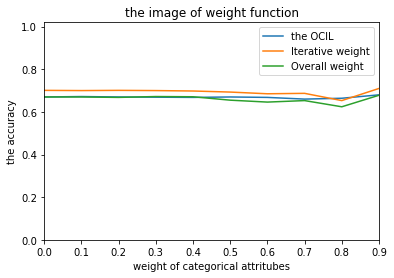

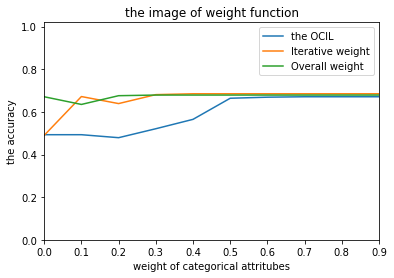

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18,Classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487


In [3]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_GerCre = pd.read_table("./German_credit/german.data", sep = " ")
targetLabel = []
for i in range(len(df_GerCre["Classification"].values)):
    if df_GerCre["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_GerCre[["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]].values
dataC = df_GerCre[["Attribute1","Attribute3","Attribute4","Attribute6","Attribute7","Attribute9","Attribute10","Attribute12","Attribute14","Attribute15","Attribute17","Attribute19","Attribute20"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T

clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.1,targetLabel)
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(Tools.myMinMaxScale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(Tools.myMinMaxScale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.1,targetLabel)
df_GerCre_des = df_GerCre.describe()
df_GerCre_des.head(3)

### the dataset of the Statlog heart

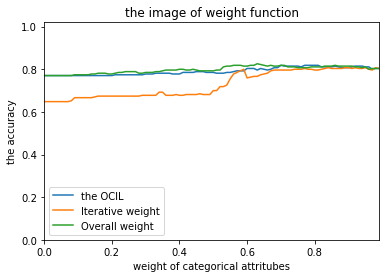

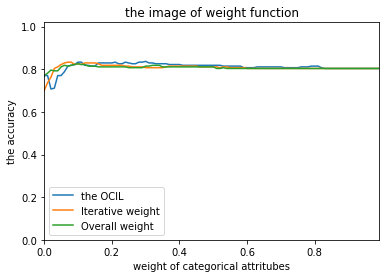

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Classification
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827


In [10]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_Statlog = pd.read_table("./Statlog_heart_data/heart.dat", sep = " ")
targetLabel = []
for i in range(len(df_Statlog["Classification"].values)):
    if df_Statlog["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_Statlog[["A1","A4","A5","A8","A10","A12","A11"]].values
dataC = df_Statlog[["A2","A3","A6","A7","A9","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.01,targetLabel)

for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(Tools.myMinMaxScale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(Tools.myMinMaxScale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.01,targetLabel)
df_Statlog_des = df_Statlog.describe()
df_Statlog_des.head(3)

### Next Research Plan:
1. Find the more proper datasets which have the significant variance between the numerical attributes
2. Verify the hypothesis about the cluster center initialization method